# Тест по теме "Введение в визуализацию данных".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cases = pd.read_csv('data/TenthCircuit.csv')

In [3]:
# Сразу подготовим дату для дальнейшей работы.
cases['Date'] = pd.to_datetime(cases['Date'])

#### Описание данных
- Title — название дела, рассматриваемого в суде
- Date — дата вынесения решения
- Issue — номер заседания
- Judge1, Judge2, Judge3 — имена судей
- Vote1, Vote2, Vote3 — голос судьи (либеральный = 1, консервативный = 0)
- Category — категория дела

#### 1. Какой график лучше всех подойдет для визуализации тренда суммарного количества всех рассмотренных дел за каждый год? Выберите один верный ответ.

*Ответ: линейный.*

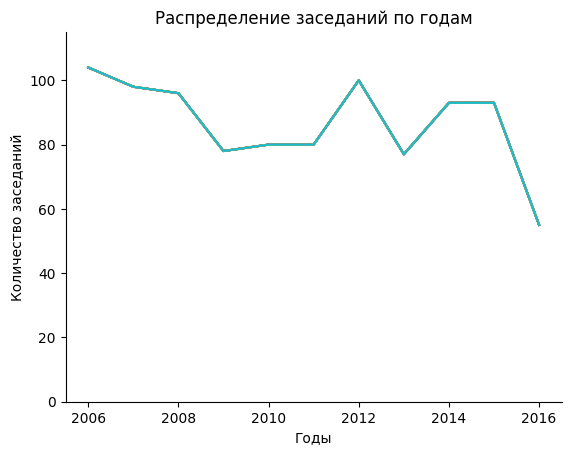

In [4]:
deal= cases.groupby(cases['Date'].dt.year).count()

fig, ax = plt.subplots()
ax.plot(deal.index, deal.values)

ax.set_title('Распределение заседаний по годам')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество заседаний')
ax.set_ylim((0, 115))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

del deal, fig, ax

#### 2. Укажите, верно ли следующее утверждение: для визуализации суммарного количества дел по каждой категории (переменная Category) подойдет столбчатая диаграмма.

*Ответ: утверждение верно.*

*Объяснение: столбчатая диаграмма подходит для отображения на графике категориальных переменных.*

#### 3. Выберите только те наблюдения, где все судьи голосовали одинаково. Постройте столбчатую диаграмму для суммарного количества заседаний по каждой категории и определите, каких заседаний и в какой категории дел больше — тех, где судьи голосовали либерально, или тех, где голоса были консервативны.

*Ответ: в обоих категориях больше консервативных решений.*

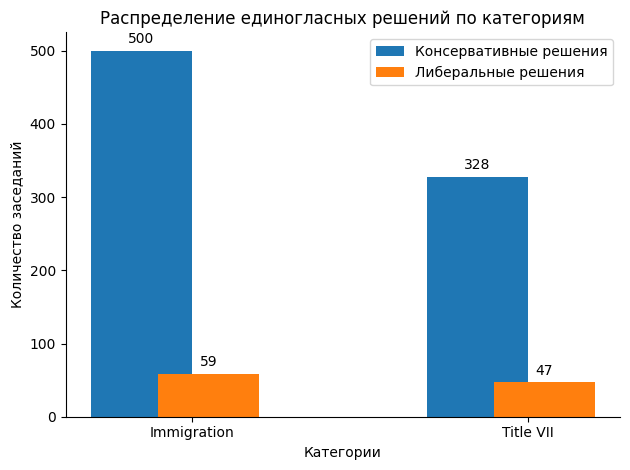

In [5]:
unanimously = cases[(cases['Vote1'] == cases['Vote2']) & (cases['Vote2'] == cases['Vote3'])]

fig, ax = plt.subplots()
w = 0.3
labels = unanimously[unanimously['Vote1'] == 0]['Category'].value_counts().index
x = np.arange(len(labels))
# Так как все судьи голосовали одинаково, можно смотреть только одну из колонок.
bar1 = ax.bar(x - w/2, unanimously[unanimously['Vote1'] == 0]['Category'].value_counts().values,
    width=w,
    label='Консервативные решения'
)
bar2 = ax.bar(x + w/6, unanimously[unanimously['Vote1'] == 1]['Category'].value_counts().values,
    width=w,
    label='Либеральные решения'
)

ax.set_title('Распределение единогласных решений по категориям')
ax.set_xticks(x, labels)
ax.set_xlabel('Категории')
ax.set_ylabel('Количество заседаний')

ax.legend()

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
fig.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Избавимся от повторяющихся переменных
del bar1, bar2, w, ax, fig, labels, unanimously

#### 4. Выберите заседания только за 2016 год. Постройте линейный график и определите, в каких месяцах наблюдались пиковые значения по числу заседаний. Будьте внимательны — даты записаны в формате месяц/день/год.

*Ответ: в январе и апреле.*

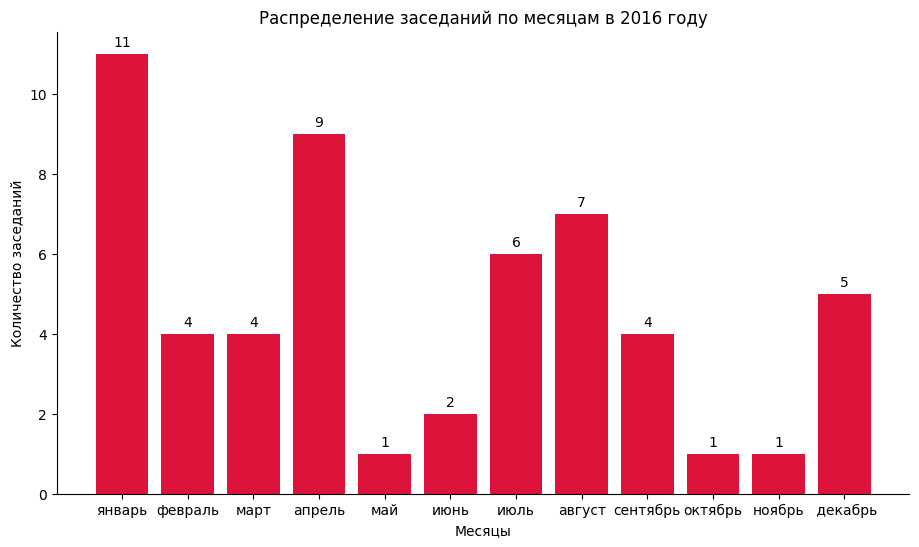

In [6]:
monts = cases[cases['Date'].dt.year == 2016].groupby(cases['Date'].dt.month)['Issue'].count()
fig, ax = plt.subplots(figsize=(11, 6))
bar1 = ax.bar(monts.index, monts, color='#dc143c')
labels = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь',' декабрь']

ax.set_title('Распределение заседаний по месяцам в 2016 году')
ax.set_xticks(monts.index, labels)
ax.set_xlabel('Месяцы')
ax.set_ylabel('Количество заседаний')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.bar_label(bar1, padding=3)

# Избавимся от повторяющихся переменных
del bar1, ax, fig, labels, monts

#### 5. Укажите, верно ли следующее утверждение: для переменных, обозначающих число заседаний и их категорию, можно построить интерпретируемую диаграмму рассеяния.
*Ответ: утверждение ложно.*

*Объяснение: график рассеяния прежде всего предназначен для отображения зависимости между количественными переменными, можно было бы отобразить на графике категорию дел, например, цветом, как это было продемонстрировано в курсе в отношении бинарной переменной (категории всего две), но только в качестве дополнительного измерения к зависимости между количественными переменными, для отображения зависимости только лишь между категорией и количеством лучше подходит столбчатая диаграмма.*

#### Задание дословно:
##### 6. Используя исходные данные, определите среднее число заседаний за каждый сезон (зима, весна, лето, осень). Постройте столбчатую диаграмму, определите месяц с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. Введите ответ в виде слова (например, осень).

#### Настоящее задание:
##### 6. Используя многолетние исходные данные, определите среднее число заседаний за зиму, за весну, за лето, и за осень. Постройте столбчатую диаграмму, определите сезон с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. Введите ответ в виде слова (например, осень).

*Ответ: зима*

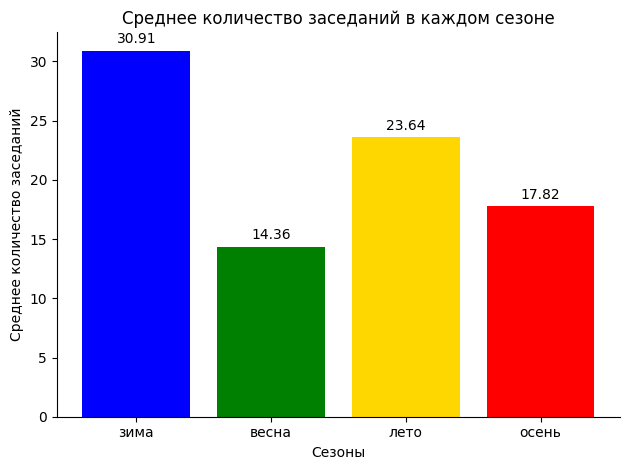

In [7]:
def get_season(month):
    """Принимает номер месяца, возвращает название сезона, к которому относится месяц.
    
    Если на вход подаётся не номер месяца, то возвращает None.
    """
    if (month <= 3) or (month == 12):
        return 'зима'
    if  3 <= month <= 5:
        return 'весна'
    if  6 <= month <= 8:
        return 'лето'
    if  9 <= month <= 11:
        return 'осень' 
    return None


seson_issue = cases.copy()

seson_issue['Season'] = seson_issue['Date'].apply(lambda x: get_season(x.month))
# Мы заранее убедились, что в данных 11 лет и в каждом году 4 сезона, поэтому общее
# количество зим, вёсен и т.д. будет равно количеству лет.
years = len(seson_issue.groupby(seson_issue['Date'].dt.year, as_index=False).count())

# Так как каждая строка это одно заседание, то функция count() подсчитает количество заседаний проведённых за все зимы и т.д.
# Затем мы делим общее количество заседаний зимой на количество зим и получаем среднее число заседаний за зиму.
# Формируем словарь из данных за все четыре сезона.
seasons_mean_issue = {
    'зима': round(seson_issue[seson_issue['Season'] == 'зима']['Issue'].count() / years, 2),
    'весна': round(seson_issue[seson_issue['Season'] == 'весна']['Issue'].count() / years, 2),
    'лето': round(seson_issue[seson_issue['Season'] == 'лето']['Issue'].count() / years, 2),
    'осень': round(seson_issue[seson_issue['Season'] == 'осень']['Issue'].count() / years, 2)
}

fig, ax = plt.subplots()
colors = ('blue', 'green', 'gold', 'red')
bar = ax.bar(seasons_mean_issue.keys(), seasons_mean_issue.values(), color=colors)

ax.set_title('Среднее количество заседаний в каждом сезоне')
ax.set_xlabel('Сезоны')
ax.set_ylabel('Среднее количество заседаний')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.bar_label(bar, padding=3)
fig.tight_layout()

# Избавимся от повторяющихся переменных
del fig, ax, bar, seson_issue, seasons_mean_issue, years

#### 7. Выберите только заседания по категории иммиграции. Постройте столбчатую диаграмму по суммарному числу заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

*Ответ: Tymkovich*

In [8]:
def all_meetings_of_judges(df):
    """Принимает датафрейм, вычисляет количество заседаний для каждого судьи.

    Возвращает два согласованных списка: имён судей и количества заседаний, в которых судья принял участие.
    """
    # Каждый судья появляется на одном заседании один раз, в одной из трёх колонок.
    # Соединим колонки в общий список, таким образом количество упоминаний имени судьи
    # в списке будет равно числу заседаний, на которых он присутствовал.
    judges_list = (df['Judge1'].values.tolist()
                   + df['Judge2'].values.tolist()
                   + df['Judge3'].values.tolist()
                   )
    # Выясним какие судьи участвовали в заседаниях в принципе.
    judges = list(set(judges_list))

    # Состаавим список из количеств появлений того или иного судьи на заседаниях.
    judges_count = []
    for name in judges:
        judges_count.append(judges_list.count(name))

    return judges, judges_count

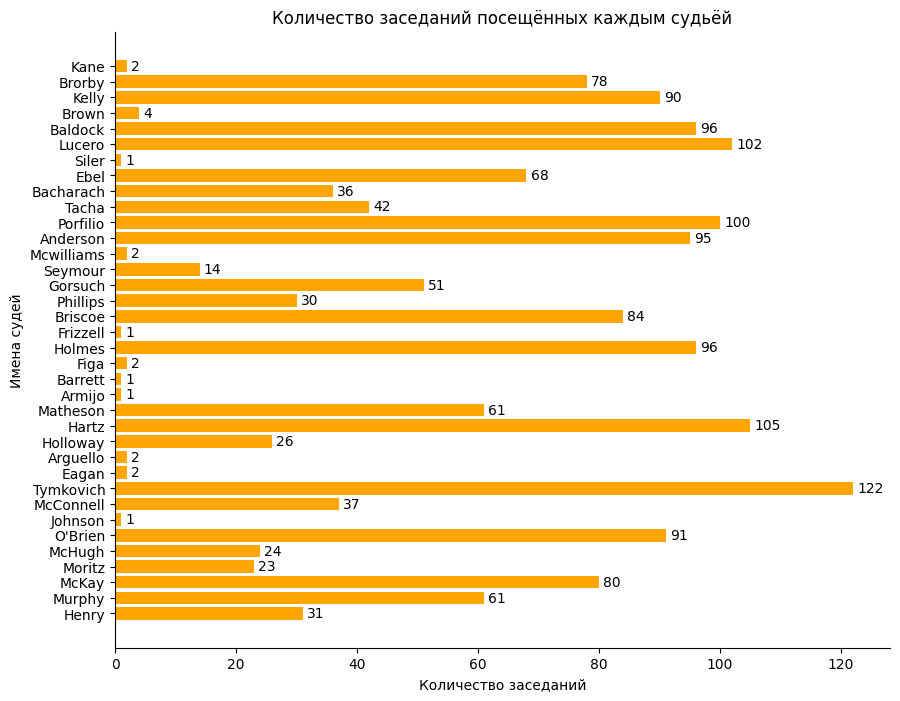

In [9]:
imigration = cases[cases['Category'] == 'Immigration']
judges, judges_count = all_meetings_of_judges(imigration)

fig, ax = plt.subplots(figsize=(10, 8))
bar = ax.barh(judges, judges_count, color='orange')

ax.set_title('Количество заседаний посещённых каждым судьёй')
ax.set_xlabel('Количество заседаний')
ax.set_ylabel('Имена судей')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(bar, padding=3)

plt.show()

del fig, ax, bar, imigration, judges, judges_count


#### 8. Определите, какие дела (переменная Title) рассматривались чаще всего. Постройте столбчатую диаграмму по суммарному числу таких заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

*Ответ: Lucero*

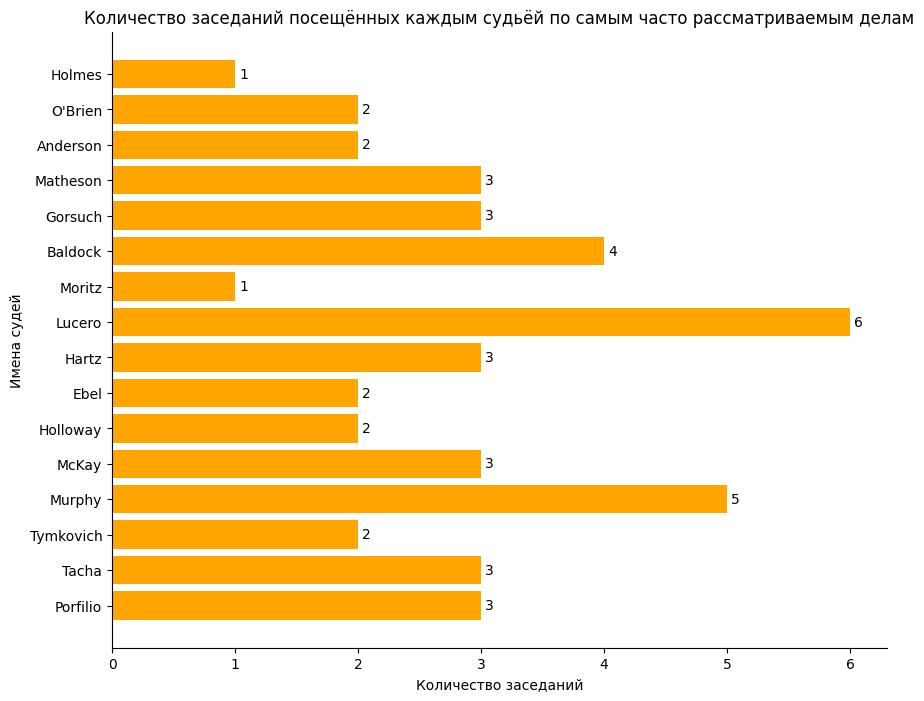

In [10]:
deals = cases.groupby('Title', as_index=False)['Issue'].count()
max = deals['Issue'].max()
deals = deals[deals['Issue'] == max]
deals = list(deals['Title'].values)

judges, judges_count = all_meetings_of_judges(cases[cases['Title'].agg(lambda x: x in deals)])

fig, ax = plt.subplots(figsize=(10, 8))
bar = ax.barh(judges, judges_count, color='orange')

ax.set_title('Количество заседаний посещённых каждым судьёй по самым часто рассматриваемым делам')
ax.set_xlabel('Количество заседаний')
ax.set_ylabel('Имена судей')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(bar, padding=3)

plt.show()

del deals, max, judges, judges_count, fig, ax

#### 9. Обратите внимание на то, как в каждом деле голосовали судьи. Постройте столбчатую диаграмму и определите, каких решений, принятых большинством (2 и более) голосов, больше. Укажите, верно ли следующее утверждение: решений, где большинство судей голосовало консервативно, больше.
*Ответ: утверждение верно*

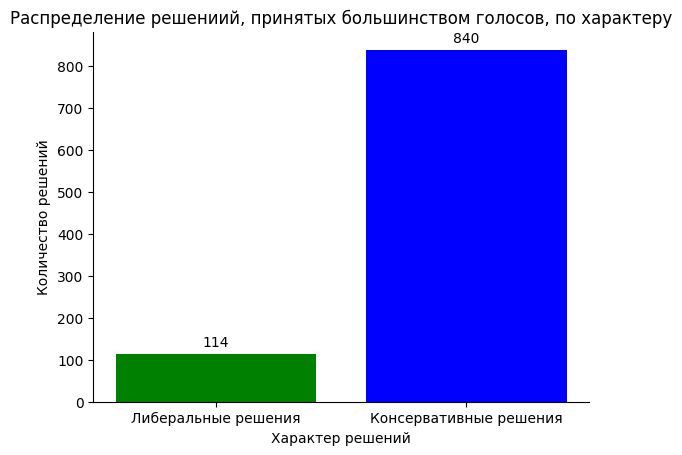

In [11]:
liberal = cases[(cases['Vote1'] == 1) & (cases['Vote2'] == 1)
    | (cases['Vote1'] == 1) & (cases['Vote3'] == 1)
    | (cases['Vote2'] == 1) & (cases['Vote3'] == 1)
]

conserv = cases[(cases['Vote1'] == 0) & (cases['Vote2'] == 0)
    | (cases['Vote1'] == 0) & (cases['Vote3'] == 0)
    | (cases['Vote2'] == 0) & (cases['Vote3'] == 0)
]

data = {'Либеральные решения': len(liberal.index), 
        'Консервативные решения': len(conserv.index)
        }


fig, ax = plt.subplots()
bar = ax.bar(data.keys(), data.values(), color=('green', 'blue'))

ax.set_title('Распределение решениий, принятых большинством голосов, по характеру')
ax.set_xlabel('Характер решений')
ax.set_ylabel('Количество решений')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.bar_label(bar, padding=3)

plt.show()

del liberal, conserv, fig, ax, bar, data

#### 10. Выберите только те заседания, в которых участвовал судья Lucero. Постройте линейный график и определите, в каком году он участвовал в заседаниях меньше всего. Будьте внимательны — даты записаны в формате месяц/день/год. В ответ запишите целое число (например, 2016).

*Ответ: 2009*

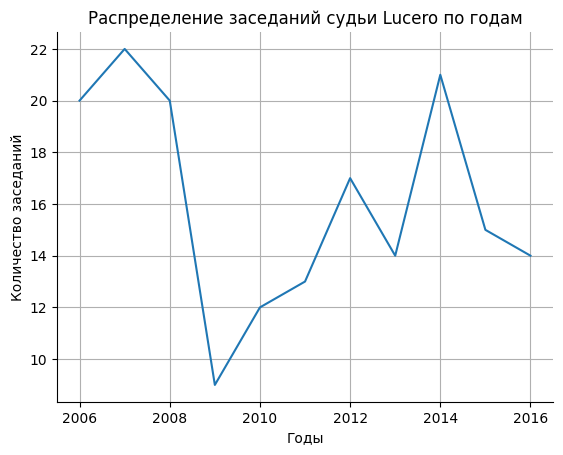

In [12]:
lucero = cases[(cases['Judge1'] == 'Lucero') | (cases['Judge2'] == 'Lucero') | (cases['Judge3'] == 'Lucero')]
deal= lucero.groupby(lucero['Date'].dt.year)['Issue'].count()
fig, ax = plt.subplots()
ax.plot(deal.index, deal)

ax.set_title('Распределение заседаний судьи Lucero по годам')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество заседаний')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid()

plt.show()

del lucero, deal, fig, ax,